In [1]:
from google.colab import drive
drive.mount('/content/drive')

project_dir = "/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project"
image_dir = project_dir + "/data/scatterplots"  # 이미지 저장 경로
pkl_dir = project_dir + "/data/scatterplots"  # 텍스트 저장 경로

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Generate One Sample (No use, only for test)

In [ ]:
#gaussian random x
import random as r
import math
def gaussian(max,len):
  mean = 2**(r.random() * math.log2(max) )
  std = r.random()*mean/2
  print(mean, std)
  x = [r.gauss(mean,std) for i in range(len)]
  return x

def uniform_int(min,max,len):
  return [r.randint(min,max) for i in range(len)]

list(range(1,31,1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

1.6341338071191054 0.44272294440486076


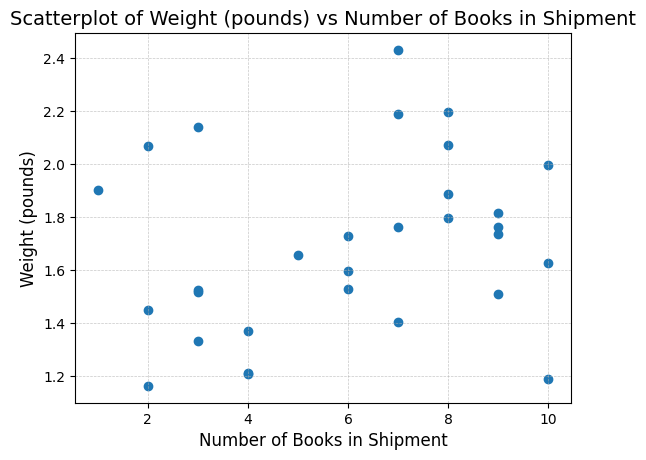

In [ ]:
def save_scatterplot(x, y, style, dpi, path, filename):
  plt.title('Scatterplot of Weight (pounds) vs Number of Books in Shipment', fontsize=14)
  plt.xlabel('Number of Books in Shipment', fontsize=12)
  plt.ylabel('Weight (pounds)', fontsize=12)

  plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.scatter(x,y)
  plt.savefig( path+filename, dpi=dpi)

path = "/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project"
filename = "scatterplot.png"
x=uniform_int(1,10,30)
y=gaussian(5,30)
save_scatterplot(x, y, 'stylle', 100, path+'/data/images/', filename)

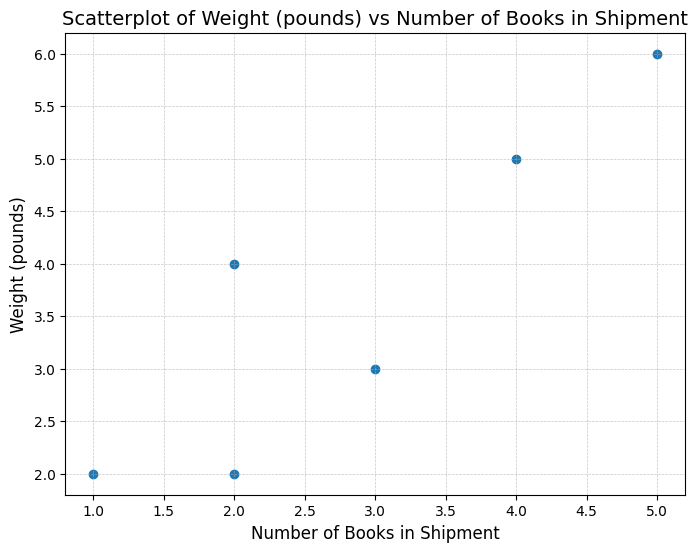

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title('Scatterplot of Weight (pounds) vs Number of Books in Shipment', fontsize=14)
plt.xlabel('Number of Books in Shipment', fontsize=12)
plt.ylabel('Weight (pounds)', fontsize=12)

plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

x = [1,3,2,2,4,5]
y = [2,3,2,4,5,6]
plt.scatter(x,y)
plt.show()

In [ ]:
x
y=x

## Generate Scatterplot dataset

### Essential functions

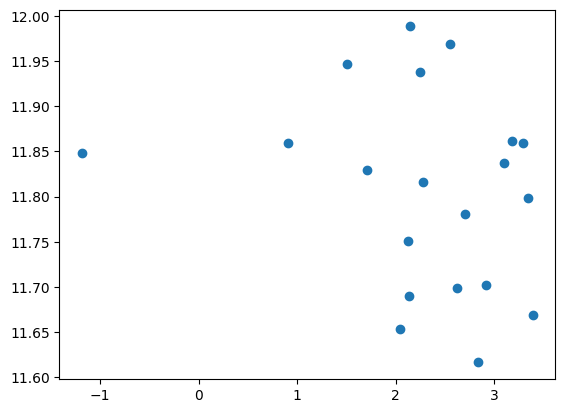

In [ ]:
# scatterplot에 들어갈 x, y 값 생성하기 위한 함수 선언
import matplotlib.pyplot as plt
import random as r
import math
def gaussian(max,length):
  mean = max**(r.random())
  std = r.random()*mean/2
  x = [r.gauss(mean,std) for i in range(length)]
  return x

def two_parted_gaussian(max,length):
  len1 = length*r.randint(3,7)//10
  len2 = length-len1
  return gaussian(max,len1)+gaussian(max*(1-r.random()**2),len2)

def uniform_int(min,max,length):
  return [r.randint(min,max) for i in range(length)]

def sequencial_int(min,length,diff):
  return list(range(min,length,diff))

def linear(x_list):
  a=r.gauss(0,3)
  b=r.random()*100-50
  se = r.random()*r.random()*(max(x_list)-min(x_list))*(a if a>=0 else -a)
  return [ (a * x_list[i]+b+r.gauss(1,se)) for i in range(len(x_list)) ]

### x list, y list 생성 ###
def generate_xlist_ylist(proportion, length, mean_points, max_xy):
  types = ['independent', 'linear',  'two-parted'] # + ['quadratic', 'exponential', 'two-linear']
  values = []
  for e in types:
    if e in proportion:
      values = values + [proportion[e]]
  lengths = list(map(lambda x: x*length//sum(values) , values ))
  while sum(lengths) != length:
    lengths[0] += 1

  # indep
  num_point = [ math.ceil(r.gauss(mean_points,4)) for i in range(lengths[0]) ]
  x_list_indep = [gaussian(r.randint(1,max_xy), num_point[i] )  for i in range(lengths[0]//2) ] + [uniform_int(min=0,max=r.randint(1,max_xy), length=num_point[i+lengths[0]//2])  for i in range(lengths[0]-lengths[0]//2) ]
  y_list_indep = [gaussian(r.randint(1,max_xy), num_point[i])  for i in range(lengths[0]) ]
  # linear
  num_point = [ math.ceil(r.gauss(mean_points,4)) for i in range(lengths[1]) ]
  x_list_linear = [gaussian(r.randint(1,max_xy), num_point[i] )  for i in range(lengths[1]) ]
  y_list_linear = list(map( linear ,x_list_linear))

  # two-parted
  num_point = [ math.ceil(r.gauss(mean_points,4)) for i in range(lengths[2]) ]
  x_list_2part = [two_parted_gaussian(r.randint(1,max_xy), num_point[i] )  for i in range(lengths[2]) ]
  y_list_2part = [two_parted_gaussian(r.randint(1,max_xy), num_point[i])  for i in range(lengths[2]) ]

  # quadratic

  # exponential

  x_list = x_list_indep+x_list_linear + x_list_2part # + x_list_quad + x_list_exp
  y_list = y_list_indep+y_list_linear + y_list_2part # + y_list_quad + y_list_exp
  return x_list, y_list

# 함수가 올바르게 동작하는지 확인
data_len = 24 # plot 개수
mean_points = 20 # plot당 평균 점 개수
max_xy = 200 # 플롯 최댓값
proportion = {"independent":2,"linear":5,"two-parted":5} # plot 비율대로 생성.(0-3 independent, 4-13 linear, 14-23 two-parted)

x_list, y_list = generate_xlist_ylist(proportion, data_len,mean_points,max_xy)
plt.scatter(x_list[0],y_list[0])

In [ ]:
# scatterplot 스타일 설정 및 좌표를 ground truth 텍스트 데이터로 변환

import matplotlib.pyplot as plt
import os
from PIL import Image
from tqdm import tqdm
import pickle

def save_scatterplot(title, xlabel, ylabel, x, y, save_path,random_state=False):
  plt.figure()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if not random_state:
    plt.title(title)
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.scatter(x, y, c="blue", marker="o")
    plt.grid(True)
    plt.savefig(save_path, format="png")

  else: # With random style
    styles = ['.','x','8','o','o', 's', 'v', '^', '<', '>', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    colors = ['black','black','darkblue','blue','blue','gray','red', 'green', 'purple', 'orange']
    background_colors = ['white', 'lightgray', 'lightblue','lightgreen']
    internal_colors = ['lightgray', 'lightyellow', 'white','white']
    edge_colors = ["black","black","gray"]

    plt.title(title, fontsize = r.randint(12,20))

    if r.random() < 0.7: # 70% 확률로 grid 생성
      plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
      plt.grid(True)

    internal_color = r.choice(internal_colors)
    ax = plt.gca()
    ax.set_facecolor(internal_color)

    if r.random() < 0.8: #full points
      plt.scatter(x, y, marker=r.choice(styles), s=r.randint(10,30), c=r.choice(colors) )
    else: # empty points
      plt.scatter(x, y, marker=r.choice(styles), s=r.randint(10,30), c=internal_color, edgecolors=r.choice(colors))

    plt.savefig(save_path, dpi=r.choice([50,100,120,120,150]), facecolor=r.choice(background_colors),
                bbox_inches='tight',pad_inches = r.random()*0.2+0.1 )
  plt.close()  # 플롯을 닫아 메모리 절약
  return save_path

def create_text_data(title, xlabel, ylabel, x, y): # Deplot 학습에 사용될 Text Data 형태로 변환
  table = []
  for i in range(len(x)):
    xi = "%.1f"%x[i]
    yi = "%.1f"%y[i]

    if xi[-2:] == ".0":
      xi = xi[:-2]
    if yi[-2:] == ".0":
      yi = yi[:-2]
    table.append(f"{xi} | {yi}")

  text_data = "TITLE | "+ title + " <0x0A> " + xlabel + " | " + ylabel + " <0x0A> " + " <0x0A> ".join(table)
  return text_data

def generate_dataset(title_list, xlabel_list, ylabel_list, x_list, y_list, image_dir, pkl_dir, dataset = [], dataset_name="dataset", random_state = False):

  save_interval = 500
  os.makedirs(image_dir, exist_ok=True)  # 이미지 저장 디렉토리 생성
  start_num = len(dataset)
  if len(dataset) !=0:
    print("datast exists")

  for i, (title, xlabel, ylabel, x, y) in enumerate(zip(tqdm(title_list), xlabel_list, ylabel_list, x_list, y_list)):
    # 이미지 저장 경로
    image_path = os.path.join(image_dir, f"{dataset_name}_{i+start_num}.png")

    # 이미지 생성 및 저장
    save_scatterplot(title, xlabel, ylabel, x, y, image_path, random_state)

    # 텍스트 데이터 생성
    text = create_text_data(title, xlabel, ylabel, x, y)

    # 데이터셋 추가
    dataset.append({"image": image_path, "text": text})

    if (i + 1) % save_interval == 0:
      with open(pkl_dir+'/dataset.pkl', 'wb') as f:
        pickle.dump(dataset, f)
      print(f"Saved dataset progress at {i + 1} entries.")

  return dataset

def title(xlabel,ylabel):
  if r.random()>0.7:
    func = lambda x, y: (x+" vs "+y)
  else:
    func = r.choice ([lambda x, y: y ,
                lambda x, y: "Relationship between " + x + " and "+y ,
                lambda x, y: ""
                ])
  return func(xlabel,ylabel)

def label_with_units(label, units):
  units = list(map(lambda x: ("(" + x + ")") , units)) + [""]
  return f"{label} {r.choice(units)}"

def generate_titles_x_ylabels(len):
  units_dict = { "Time": ["hours", "seconds", "minutes"], "Temperature": ["K", "˚C", "˚F"], "Age": ["years", "months", "days"], "Height": ["meters", "centimeters", "inches"], "Year": ["years"],
                "Sales": ["units", "$", "euros"], "Distance": ["meters", "kilometers", "miles"], "Speed": ["m/s", "km/h", "mph"], "Population": ["people"], "Area": ["square meters", "square kilometers", "acres"],
                 "Calories": ["kcal"], "Weight": ["kg", "grams","g", "lbs"], "Duration": ["seconds", "minutes", "hours", "sec"],
                 "Completion": ["%"], "Days": [], "Revenue": ["$", "euros"], "Participants": ["people"], "Score": ["points"],
                 "Number of Steps": [], "Burned": ["calories"], "Months": [], "Users": [], "Hours": [], "Efficiency": ["%"],
                 "Investment": ["$", "euros"], "Profit": ["$", "euros"], "Width": ["meters", "centimeters", "inches"], "Years": ["years"],
                 "Salary": ["$", "euros"], "Depth": ["meters", "feet"], "Pressure": ["pa", "bars", "psi"], "Accuracy": ["%"], "Consumption": ["liters", "gallons"],
                 "Progress": ["%YoY", "%"], "Miles": [], "Fuel": ["liters", "gallons"], "Grades": ["points", "letters"], "Rainfall": ["mm", "inches"], "Yield": ["%"],
                 "Exercise": ["minutes", "hours"], "Study": ["minutes", "hours"], "Exam": ["points"], "Training": ["minutes", "hours"], "Performance": ["points", "%"],
                 "Sleep": ["hours"], "Total Productivity": ["%"], "Income": ["$", "euros"], "Savings": ["$", "euros"], "Air": ["ppm"],
                 "Health": ["index"], "Water": ["liters", "gallons"], "Energy": ["J", "kWh"], "Engagement": ["%"], "Conversion": ["%"], "Job Satifaction": [],
                 "Rating": ["points", "stars"], "Travel": ["kilometers", "miles"], "Visits": ["visits"], "Screen": ["hours"], "Strain": ["index"], "Advertising": ["dollars", "euros", "$"], "Quality": ["percentage"] }
  units_dict.update({ "Brightness": ["lumens", "candela"], "Frequency": ["hertz", "kHz"], "Voltage": ["volts", "mV"], "Current": ["amperes", "milliamps"], "Power": ["watts", "kilowatts"], "Resistance": ["ohms"], "Humidity": ["percentage"], "Radiation": ["sieverts", "rem"], "Torque": ["newton meters"], "Velocity": ["m/s", "km/h"]})
  letters_set = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"

  xlabels = [] ; ylabels = [] ; titles = []
  for i in range(len):
    if r.random() < 0.2:
      xlabel = ''.join(r.sample(letters_set,r.randint(5,25)))
      ylabel = ''.join(r.sample(letters_set,r.randint(5,25)))
      xlabels.append(xlabel)
      ylabels.append(ylabel)
    else:
      xlabel = r.choice(list(units_dict.keys()))
      ylabel = r.choice(list(units_dict.keys()))
      xlabels.append(label_with_units(xlabel, units_dict[xlabel]))
      ylabels.append(label_with_units(ylabel, units_dict[ylabel]))
    titles.append(title(xlabel,ylabel))

  return titles, xlabels, ylabels

print(generate_titles_x_ylabels(5))


(['Progress vs Salary', 'Users vs Number of Steps', 'Relationship between Current and Training', 'Air vs Conversion', ''], ['Progress (%)', 'Users ', 'Current (milliamps)', 'Air ', 'Fuel '], ['Salary (euros)', 'Number of Steps ', 'Training (hours)', 'Conversion (%)', 'Consumption (liters)'])


### Generate Datasets

In [ ]:
# 기존 데이터셋 가져오기
import pickle

# Load the dataset from the file
with open(pkl_dir+'/dataset.pkl', 'rb') as f:
    loaded_dataset = pickle.load(f)

In [ ]:
if __name__ == "__main__":

  # 예제 데이터 명세
  data_len = 5000 # plot 개수
  mean_points = 16 # plot당 평균 점 개수
  max_xy = 200 # 플롯 최댓값
  proportion = {"independent":0,"linear":8,"two-parted":2}

  x_list, y_list = generate_xlist_ylist(proportion, data_len,mean_points,max_xy)
  """
  point_cnt = [ math.ceil(r.gauss(mean_points,4)) for i in range(data_len) ]
  x_list = [gaussian(r.randint(1,max_xy), point_cnt[i] )  for i in range(data_len) ]
  #[uniform_int(1,r.randint(2,max_xy), point_cnt[i] ) ) for i in range(data_len) ]
  y_list = [gaussian(r.randint(1,max_xy), point_cnt[i])  for i in range(data_len) ]
  """

  title_list, xlabel_list, ylabel_list = generate_titles_x_ylabels(data_len)

  # 데이터셋 생성
  dataset = generate_dataset(title_list, xlabel_list, ylabel_list,x_list, y_list, image_dir, pkl_dir, dataset = loaded_dataset, random_state = True)


datast exists


  0%|          | 2/5000 [00:00<25:34,  3.26it/s]<ipython-input-4-fbd6f2cdc0a5>:40: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker=r.choice(styles), s=r.randint(10,30), c=internal_color, edgecolors=r.choice(colors))
  0%|          | 19/5000 [00:07<23:55,  3.47it/s]<ipython-input-4-fbd6f2cdc0a5>:40: UserWarning: You passed a edgecolor/edgecolors ('darkblue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker=r.choice(styles), s=r.randint(10,30), c=internal_color, edgecolors=r.choice(colors))
  5%|▌         | 252/5000 [01:28<27:27,  2.88it/s]<ipython-input-4-fbd6f2cdc0a5>:40: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of

Saved dataset progress at 500 entries.


 16%|█▋        | 814/5000 [04:50<22:34,  3.09it/s]<ipython-input-4-fbd6f2cdc0a5>:40: UserWarning: You passed a edgecolor/edgecolors ('orange') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker=r.choice(styles), s=r.randint(10,30), c=internal_color, edgecolors=r.choice(colors))
 18%|█▊        | 883/5000 [05:15<27:03,  2.54it/s]<ipython-input-4-fbd6f2cdc0a5>:40: UserWarning: You passed a edgecolor/edgecolors ('gray') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker=r.choice(styles), s=r.randint(10,30), c=internal_color, edgecolors=r.choice(colors))
 20%|██        | 1000/5000 [05:58<33:41,  1.98it/s]

Saved dataset progress at 1000 entries.


 30%|███       | 1500/5000 [09:01<17:52,  3.26it/s]

Saved dataset progress at 1500 entries.


 36%|███▌      | 1786/5000 [10:39<16:57,  3.16it/s]<ipython-input-4-fbd6f2cdc0a5>:40: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker=r.choice(styles), s=r.randint(10,30), c=internal_color, edgecolors=r.choice(colors))
 40%|████      | 2000/5000 [11:55<15:06,  3.31it/s]

Saved dataset progress at 2000 entries.


 50%|█████     | 2500/5000 [14:50<13:21,  3.12it/s]

Saved dataset progress at 2500 entries.


 60%|██████    | 3000/5000 [17:43<11:04,  3.01it/s]

Saved dataset progress at 3000 entries.


 70%|███████   | 3500/5000 [20:39<08:13,  3.04it/s]

Saved dataset progress at 3500 entries.


 80%|████████  | 4000/5000 [23:33<05:41,  2.93it/s]

Saved dataset progress at 4000 entries.


 90%|█████████ | 4500/5000 [26:31<02:34,  3.23it/s]

Saved dataset progress at 4500 entries.


100%|██████████| 5000/5000 [29:22<00:00,  2.84it/s]

Saved dataset progress at 5000 entries.


In [ ]:
# dataset 순서 랜덤하게 섞기
r.shuffle(dataset)

In [ ]:
# dataset.pkl 파일로 데이터셋 내보내기

import pickle

# Save the dataset to a file
with open(pkl_dir+'/dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

True


In [9]:
# Load the dataset from the file
import pickle
with open(pkl_dir+'/dataset.pkl', 'rb') as f:
    loaded_dataset = pickle.load(f)

In [ ]:
# Verify that the loaded dataset is the same as the original
print(loaded_dataset == dataset)

Image '/content/drive/My Drive/Colab Notebooks/COSE474 Deep Learning HW/20242R0136COSE47402/Final Project/data/scatterplots/dataset_6011.png' opened successfully.


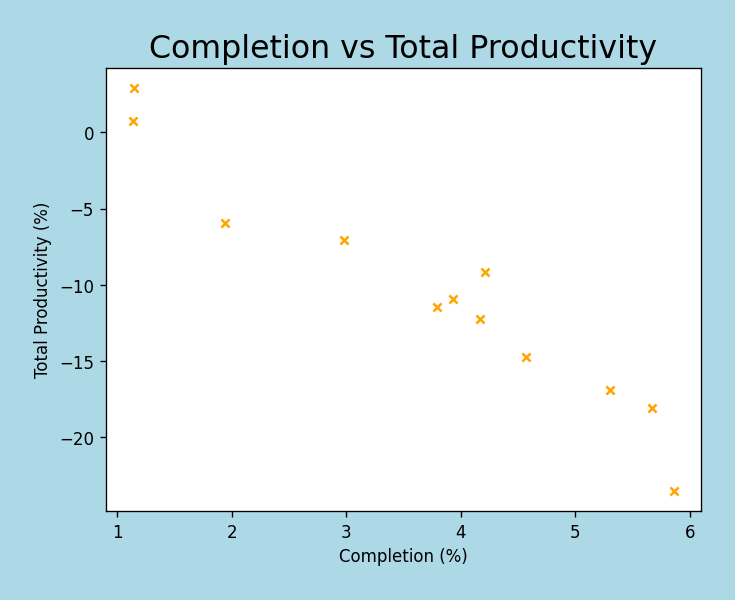

In [7]:


from PIL import Image
import os

image_path = image_dir+"/dataset_6011.png"

try:
    img = Image.open(image_path)
    print(f"Image '{image_path}' opened successfully.")

except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
except Exception as e:
    print(f"An error occurred: {e}")
img

In [12]:
table = loaded_dataset[6011]['text']

In [15]:
print(table.replace('<0x0A>','\n'))

TITLE | Completion vs Total Productivity 
 Completion (%) | Total Productivity (%) 
 3.8 | -11.4 
 5.3 | -16.9 
 4.6 | -14.7 
 1.9 | -5.9 
 3 | -7 
 4.2 | -9.1 
 5.7 | -18.1 
 1.1 | 0.7 
 4.2 | -12.2 
 5.9 | -23.5 
 1.1 | 2.9 
 3.9 | -10.9


In [13]:
def convert_to_float(x):
  try:
    return float(x)
  except ValueError:
    return x

def resolve(output):
  output
  a=[]
  for e in table.split('<0x0A>'):
    a.append(e.split(' | '))
  #print(a)
  title, xlabel, ylabel = a[0][1], a[1][0], a[1][1]
  for i in range(2,len(a)):
    for j in range(0,len(a[i])):
      a[i][j] = convert_to_float(a[i][j])

  x = [a[i][0] for i in range(2,len(a))]
  y = [a[i][1] for i in range(2,len(a))]
  return title, xlabel, ylabel, x, y

ttl,xlbl,ylbl,x,y = resolve(table)
print(ttl,xlbl,ylbl)
print(x)
print(y)

Completion vs Total Productivity   Completion (%) Total Productivity (%) 
[3.8, 5.3, 4.6, 1.9, 3.0, 4.2, 5.7, 1.1, 4.2, 5.9, 1.1, 3.9]
[-11.4, -16.9, -14.7, -5.9, -7.0, -9.1, -18.1, 0.7, -12.2, -23.5, 2.9, -10.9]
